In [4]:
from math import *
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import patches

from astropy.io import fits
import healpy as hp

from skipper import shape, hsc

In [5]:
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] = 35
plt.rcParams['axes.titlepad'] = 40

### import the HSC FDFC Healpix mask

In [7]:
# Read the HSC FDFC Healpix mask 
HSC_S20_fdfc = hp.read_map('../data/s20a_fdfc_hp_contarea_izy-gt-5.fits', nest=True, dtype=np.bool)

/Users/shanydanieli/anaconda2/envs/astroconda/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 1024
  warnings.warn("NSIDE = {0:d}".format(nside))
/Users/shanydanieli/anaconda2/envs/astroconda/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/Users/shanydanieli/anaconda2/envs/astroconda/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


### read the i-band random catalog and filter through the FDFC mask

In [10]:
# Read the random catalog in the i-band only
hdul = fits.open('../data/merian_random_iband_only_1.fits')
randoms_data = hdul[1].data

# filtered_catalog = filter_healpix_mask(HSC_S20_fdfc,randoms_data[0:10000000])
filtered_catalog = hsc.filter_healpix_mask(HSC_S20_fdfc,randoms_data)
ra_filtered = filtered_catalog['ra']
dec_filtered = filtered_catalog['dec']

# 19827548/42406457 objects are selected by the mask


### plot the entire FDFC fields

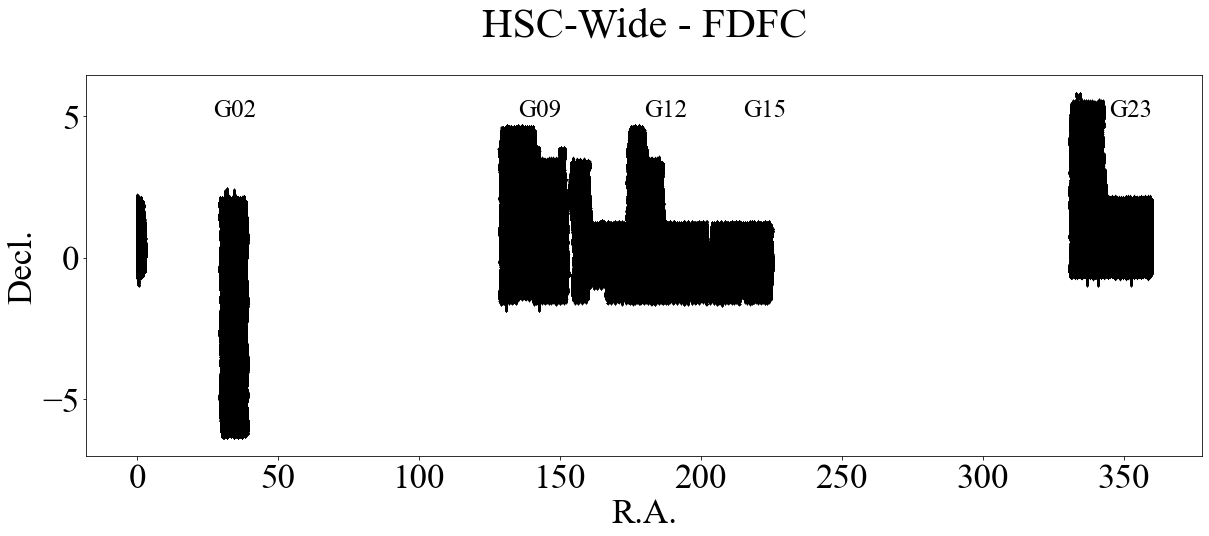

In [13]:
fig = plt.figure(1, figsize=(20,7))
plt.xlabel('R.A.')
plt.ylabel('Decl.')
plt.title('HSC-Wide - FDFC')
plt.scatter(ra_filtered,dec_filtered,c='k',s=0.05)
# plt.xlim(125,230)
plt.text(27,5,'G02', size=25)
plt.text(135,5,'G09', size=25)
plt.text(180,5,'G12', size=25)
plt.text(215,5,'G15', size=25)
plt.text(345,5,'G23', size=25)
# plt.savefig('../figures/GAMA_fp.jpeg')

### zooming-in on the GAMA 09, 12, and 15 fields

Text(215, 5, 'G15')

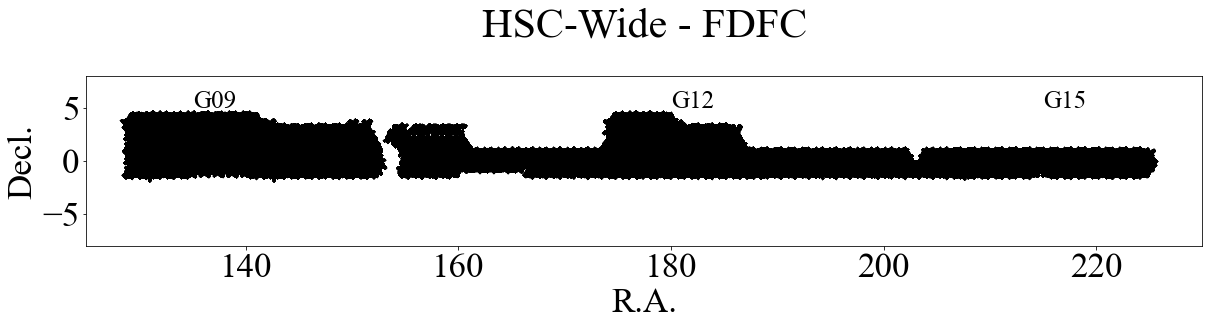

In [14]:
# fig = plt.figure(1, figsize=(20,7))

fig = plt.figure (figsize=(20,7))
ax = plt.subplot(111, aspect='equal')


plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] = 35
plt.rcParams['axes.titlepad'] = 40

ax.set_xlabel('R.A.')
ax.set_ylabel('Decl.')
ax.set_title('HSC-Wide - FDFC')
ax.scatter(ra_filtered,dec_filtered,c='k',s=0.05)

ax.set_xlim(125,230)
ax.set_ylim(-8,8)
ax.text(135,5,'G09', size=25)
ax.text(180,5,'G12', size=25)
ax.text(215,5,'G15', size=25)

### in the Merian March 2021 observing run, we will focus on the G09 field

In [15]:
# Starting with GAMA09
# get the points only in the GAMA region
ra_lowlim = 120
ra_uplim = 153

ra_gama09 = [x for x in ra_filtered if ra_lowlim<x<ra_uplim]
dec_gama09 = [dec_filtered[i] for i in range(len(dec_filtered)) if ra_lowlim<ra_filtered[i]<ra_uplim]
gama_coor09 = np.vstack((ra_gama09,dec_gama09)).T

### get concave hull edges for the points in the GAMA region

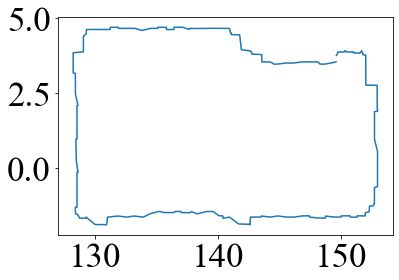

In [17]:
gama_edges1 = shape.concave_hull(gama_coor09, alpha=1.)
plt.plot(gama_edges1[:,0],gama_edges1[:,1])
plt.xlabel

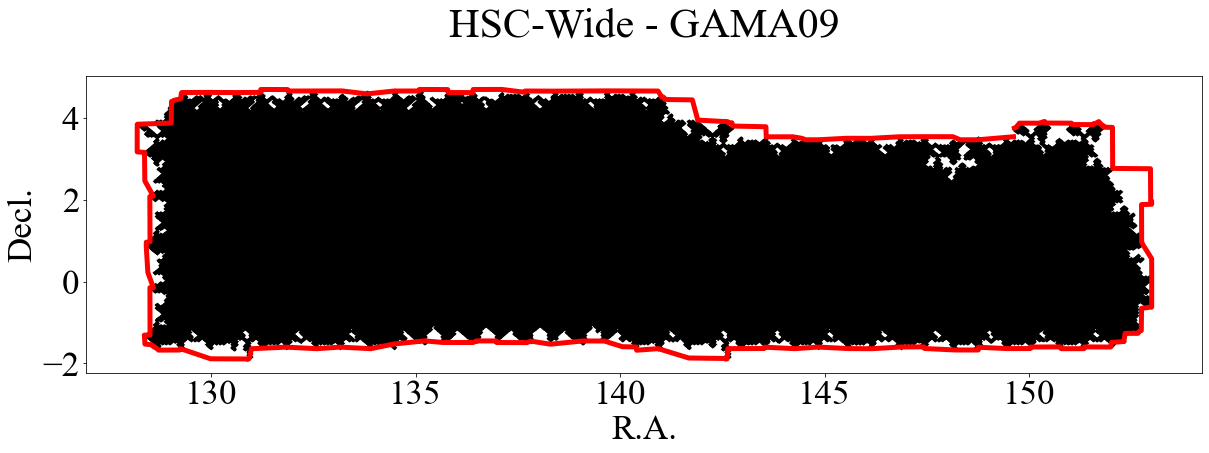

In [18]:
fig = plt.figure (figsize=(20,7))
ax = plt.subplot(111, aspect='equal')
ax.set_xlabel('R.A.')
ax.set_ylabel('Decl.')
ax.set_title('HSC-Wide - GAMA09')
ax.scatter(ra_gama09,dec_gama09,c='k',s=0.05)
ax.plot(gama_edges1[:,0],gama_edges1[:,1],color='r',lw=5)

### write the GAMA09 edge to a file

In [23]:
# file = open('../data/g09edge.dat','w')
np.savetxt('../data/g09edge.dat', gama_edges1)